# Linear Regression: Training, Testing, and Predicting
## Sources: 
1. <a href="https://pythonprogramming.net/training-testing-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Training and Testing</a>
2. <a href="https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Forecasting and Predicting</a>

In the previous notebooks, we learned what linear regression is, what features and labels are, and why as well as how to scale the features.  In this notebook, we will train and test our data, then use it to predict future prices.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Raise errors instead of give warnings
pd.set_option("mode.chained_assignment", "raise")

In [3]:
# Import data
import os
data_file_path = os.path.join("Data","stock_data.csv")

stock_data = pd.read_csv(data_file_path, index_col="Date")
display(stock_data.head())
display(stock_data.tail())

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.818025,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.707965,-5.353887,2940957.0,NaN


In [4]:
# Define features
X = np.array(stock_data.drop(["Forecast"], 1))

# Define labels
y = np.array(stock_data["Forecast"])

In [5]:
# Scale the features
X = preprocessing.scale(X)

### Note!

Recall that we engineered the labels column—or the Forecast column—by shifting the values in the Adj. Close column up 172 values.  This would mean that the last 172 rows in the Forecast column have no value.  We will show this more clearly by looking at the last 174 rows of the dataframe.

In [6]:
# Define the number of days out we want to forecast
# In this case, want to forecast out 5% of the dataframe
import math
forecast_out = math.ceil(0.05*len(stock_data))

# Preview last 174 columns of data
display(stock_data.tail((forecast_out+2)))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-07-18,986.95,1.935106,1.396195,1398920.0,942.02
2017-07-19,992.77,0.870305,0.278785,1392709.0,949.89
2017-07-20,992.19,1.427962,-0.482447,1410290.0,941.41
2017-07-21,993.84,1.111597,0.489383,1412108.0,943.29
2017-07-24,998.31,1.607355,0.423499,3053176.0,946.65
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN


Therefore, we must also adjust our features $X$ and labels $y$ such that it excludes the last 172 values.  We cannot train a linear regression model with missing labels.

In [7]:
# Only include values up until the row before the Forecast values become null
# or rather, exclude the last 5% of values
# Recall that when specifying a range,
# Python excludes the last value
X_known = X[:-forecast_out]
y_known = y[:-forecast_out]

In [8]:
# Confirm features and labels are the same length
length_of_features = len(X)
length_of_labels = len(y)

print(f"Length of features: {length_of_features}")
print(f"Length of labels: {length_of_labels}")

Length of features: 3424
Length of labels: 3424


### Training and Testing

When building a machine learning model, you will usually split your data into training and testing sets.  The training set is passed into the classifier so that it can build the equation used to make predictions (recall that the equal for a line is: $y=mx+b$).  The testing set can then be used to measure the accuracy of the classifier.

Note that there are three different groups of data — the known data we train with, the known data with test with, then any future data we don't know the label of yet.  In the training and testing sets, we know both the features and the labels.  With the training set, we use both the features and the labels to build the model.  With the testing set, we pass the features in, and compare the model's predicted labels to the actual labels, in order to evaluate how accurate the model is.  We can then use existing data apart from the training or testing data to predict future labels, or in general, future values.

In [9]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2)

# Define which classification algorithm we are using
classifier = LinearRegression()

# Fit- or train- the classifier
classifier.fit(X_train, y_train)

# Print the score—or accuracy—of the classifier
print(classifier.score(X_test, y_test))

0.9717436305618125


We tested our model and got a score of 92% accuracy.  Whether or not this is good is subjective, and varies with each project.  What it means in our case it that we can predict future prices, and we can be 92% sure that our prediction is valid.

### Predicting

We are now ready to forecast out into the future.  Recall that earlier we defined X_known and y_known as the features and labels only up to the point where we still knew the label.  For the last 172 records, we do not know the label — these are the values we actually want to predict.  We do have features for these last 172 records though; so we may pass these into our linear regression model to calculate the label value.  We will therefore define X_forecast as the opposite of X_known — everything after the point where we still knew the label.

In [10]:
# Define what we want to forecast
# Recall that X_known is defined as: X_known = X[:-forecast_out]
# We will therefore forecast out using "the rest" of the features
X_forecast = X[-forecast_out:]

In [11]:
# Make prediction
forecast = classifier.predict(X_forecast)

# Preview forecasted values
print(forecast)

[1004.0932238  1006.36587374 1009.67151272  979.25659121  976.82936624
  961.32958306  970.45075239  956.20157558  959.12338737  959.22096915
  952.56028075  958.63674483  958.56863117  956.6567152   952.66416268
  934.68521795  942.56392455  951.83806343  950.9498063   956.91821586
  938.89474866  938.9054825   933.26257964  952.75779265  955.38826347
  948.67599985  942.70224198  940.76176889  948.17026738  956.38973191
  967.85876975  964.58925006  953.21270821  954.27694551  962.44794248
  953.69125205  955.51118437  959.13296686  963.41413798  952.4143176
  947.3148063   941.88860178  949.44815183  959.96524158  959.74275595
  955.98715562  945.89494879  949.9520803   971.43378197  977.57032439
  986.26534925  979.08528565  984.86872548  979.37992183  997.45874609
 1006.04907185 1004.84495244  999.51944598 1017.71427001 1018.04834623
 1020.47752306 1021.85884569 1023.84840443 1025.18673427 1014.03530219
 1017.65001214  996.07767928 1000.80425651 1003.52185466 1002.89903808
 1042.3

The values printed above are the predicted values for the next $a$ days, where $a$ is 5% of the length of the dataframe, as defined earlier.  Using Linear Regression, we have forecasted out future stock prices.

Recall that the last $a$ rows of the Forecast column in our stock_data dataframe are NaN values, where $a$ is 5% of the length of the dataframe.

In [12]:
display(stock_data.tail(forecast_out+2))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-07-18,986.95,1.935106,1.396195,1398920.0,942.02
2017-07-19,992.77,0.870305,0.278785,1392709.0,949.89
2017-07-20,992.19,1.427962,-0.482447,1410290.0,941.41
2017-07-21,993.84,1.111597,0.489383,1412108.0,943.29
2017-07-24,998.31,1.607355,0.423499,3053176.0,946.65
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN


  We will therefore fill these values in with our forecast predictions.

In [13]:
# Fill in NaN values with forecast array
stock_data["Forecast"][-forecast_out:] = forecast
display(stock_data.tail(forecast_out+2))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-07-18,986.95,1.935106,1.396195,1398920.0,942.020000
2017-07-19,992.77,0.870305,0.278785,1392709.0,949.890000
2017-07-20,992.19,1.427962,-0.482447,1410290.0,1004.093224
2017-07-21,993.84,1.111597,0.489383,1412108.0,1006.365874
2017-07-24,998.31,1.607355,0.423499,3053176.0,1009.671513
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,1105.219793
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,1061.772180
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,1035.017013


### Visualizing Forecast

Here we will visualize our forecast to better see what we did.

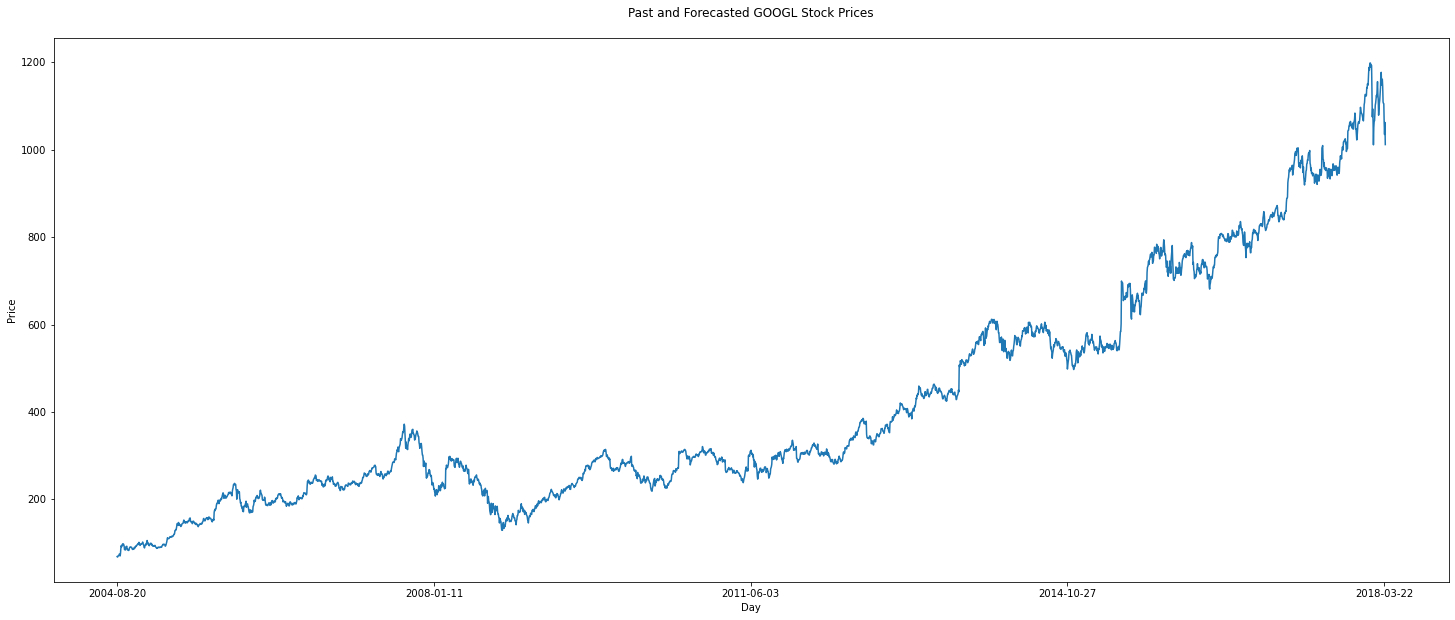

In [14]:
# import plotting library and visualize past data along with forecasted data
%matplotlib inline
import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("ggplot")

# Create plot figure
_ = plt.figure(figsize=(25,10))

# plot past and forecasted data
_ = plt.plot(stock_data["Forecast"])


# Add title and axis labels
_ = plt.title("Past and Forecasted GOOGL Stock Prices\n")
_ = plt.xlabel("Day")
_ = plt.ylabel("Price")

# Change number of tick marks on the x-axis for readability
plt.xticks(ticks=[1, 3420/4, 3420/2, ((3420/2)+3420)/2, 3420])

# axes = plt.axes()
# axes.set_xticks([4])

plt.show()

As can be seen in the plot above, we can view the forecasted values, but we can't tell where the past data actually stops, and where the forecasted values begin.  For situations such as this, it may be beneficial to use past data and forecasted data as separate datasets, while still plotting on the same graph.

In [15]:
# Create new dataframe,
# containing only the last a rows of the original,
# where a is 1% of the length of the dataframe
stock_data_forecast = stock_data[-forecast_out:].copy()

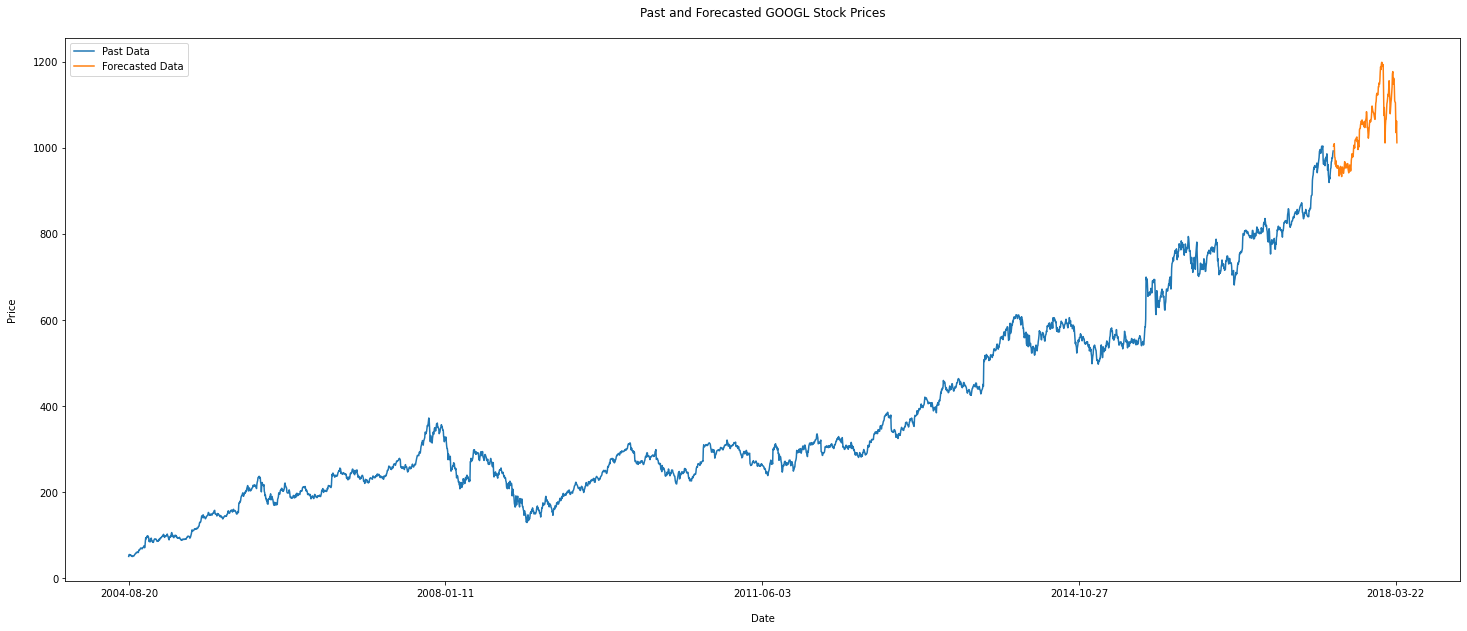

In [16]:
# Create a plot figure
figure_length = 25
figure_height = 10
plt.figure(figsize=(figure_length,figure_height))

# Plot past data and forecast data as separate data
plt.plot(stock_data["Adj. Close"][:-forecast_out], label="Past Data")
plt.plot(stock_data_forecast["Forecast"][-forecast_out:], label="Forecasted Data")

# Add title, legend, and axis labels
plt.legend()
plt.xlabel("\nDate")
plt.ylabel("Price\n")
plt.title("Past and Forecasted GOOGL Stock Prices\n")

# Change number of tick marks on the x-axis for readability
plt.xticks(ticks=[1, 3420/4, 3420/2, ((3420/2)+3420)/2, 3420])

plt.show()